# Judul Classifier

## Import Package/Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix, f1_score
sns.set()


## Import Dataset
<br>
Jumlah samples / rows: 1473
<br>
Jumlah features / columns: 10 (termasuk kelas yang diklasifikasikan)
<br>
Nilai features yang hilang: Tidak ada
<br>
Informasi features:

> 1. Wife's age                     (numerical)
> 2. Wife's education               (categorical)      1=low, 2, 3, 4=high
> 3. Husband's education            (categorical)      1=low, 2, 3, 4=high
> 4. Number of children ever born   (numerical)
> 5. Wife's religion                (binary)           0=Non-Islam, 1=Islam
> 6. Wife's now working?            (binary)           0=Yes, 1=No
> 7. Husband's occupation           (categorical)      1, 2, 3, 4
> 8. Standard-of-living index       (categorical)      1=low, 2, 3, 4=high
> 9. Media exposure                 (binary)           0=Good, 1=Not good
> 10. Contraceptive method used     (class attribute)  1=No-use, 2=Long-term, 3=Short-term

In [2]:
df = pd.read_csv('D:/contraceptive.csv')
df.head()

,Wife's age,Wife's education,Husband's education,Number of children ever born,Wife's religion,Wife's now working,Husband's occupation,Standard-of-living index,Media exposure,Contraceptive method used
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


## Data Preparation

### Membagi data menjadi 3 kelas 
> - No-use
> - Long-term
> - Short-term
>
> Masing-masing kelas memiliki jumlah sample 500

In [3]:
no_use = df[df['Contraceptive method used'] == 1]
long_term = df[df['Contraceptive method used'] == 2]
short_term = df[df['Contraceptive method used'] == 3]

no_use.reset_index(drop=True, inplace=True)
no_use = no_use.iloc[:500]

long_term.reset_index(drop=True, inplace=True)
long_term = pd.concat([long_term, long_term.iloc[:167]], ignore_index=True)

short_term.reset_index(drop=True, inplace=True)
short_term = short_term.iloc[:500]

### Membuat dataset untuk training dan testing

> Metode yang digunakan adalah Cross Validation dengan perbandingan:
> - Training : 50%
> - Testing : 50%

In [4]:
train_df = pd.concat([no_use[:250], long_term[:250], short_term[:250]])
train_df.reset_index(drop=True, inplace=True)

test_df = pd.concat([no_use[250:], long_term[250:], short_term[250:]])
test_df.reset_index(drop=True, inplace=True)

train_df.info()
test_df.info()

# Tukar data training dan testing
train_df2 = test_df.copy()
test_df2 = train_df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 10 columns):
Wife's age                      750 non-null int64
Wife's education                750 non-null int64
Husband's education             750 non-null int64
Number of children ever born    750 non-null int64
Wife's religion                 750 non-null int64
Wife's now working              750 non-null int64
Husband's occupation            750 non-null int64
Standard-of-living index        750 non-null int64
Media exposure                  750 non-null int64
Contraceptive method used       750 non-null int64
dtypes: int64(10)
memory usage: 58.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 10 columns):
Wife's age                      750 non-null int64
Wife's education                750 non-null int64
Husband's education             750 non-null int64
Number of children ever born    750 non-null int64
Wife's religion                 750 

In [5]:
# Data yang akan digunakan
X_train = train_df.drop(columns=['Contraceptive method used'])
y_train = train_df['Contraceptive method used']
X_test = test_df.drop(columns=['Contraceptive method used'])
y_test = test_df['Contraceptive method used']

# Data untuk cross validation
X_train2 = train_df2.drop(columns=['Contraceptive method used'])
y_train2 = train_df2['Contraceptive method used']
X_test2 = test_df2.drop(columns=['Contraceptive method used'])
y_test2 = test_df2['Contraceptive method used']

# Target class
target = np.array(['No-use', 'Long-term', 'Short-term'])

# Dataframe untuk recognition rate per kelas
recognition_rate = pd.DataFrame(index=target)
recognition_rate.index.name = 'Classes'

# Dataframe untuk hasil pengujian
data = {'y_test':y_test, 'y_test2':y_test2}
test_result = pd.DataFrame(data)
test_result.head()

,y_test,y_test2
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


## KNN Classifier

### Test 1


              precision    recall  f1-score   support

      No-use       0.54      0.57      0.55       250
   Long-term       0.53      0.62      0.57       250
  Short-term       0.47      0.36      0.41       250

    accuracy                           0.52       750
   macro avg       0.51      0.52      0.51       750
weighted avg       0.51      0.52      0.51       750



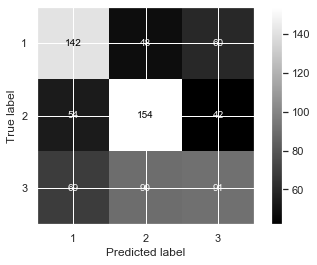

In [6]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
test_result['n neighbors=5_1'] = y_pred
acc1 = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred, target_names=target))
plot_confusion_matrix(knn, X_test, y_test, cmap=plt.get_cmap('gray'))
plt.show()

              precision    recall  f1-score   support

      No-use       0.57      0.58      0.57       250
   Long-term       0.52      0.62      0.56       250
  Short-term       0.51      0.40      0.45       250

    accuracy                           0.53       750
   macro avg       0.53      0.53      0.53       750
weighted avg       0.53      0.53      0.53       750



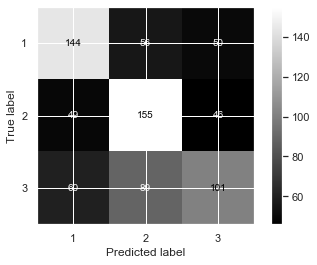

In [7]:
knn.fit(X_train2, y_train2)


y_pred = knn.predict(X_test2)
test_result['n neighbors=5_2'] = y_pred
acc2 = accuracy_score(y_test2, y_pred)
recognition_rate['Neighbors=5'] = f1_score(y_test2, y_pred, average=None)
print(classification_report(y_test2, y_pred, target_names=target))
plot_confusion_matrix(knn, X_test2, y_test2, cmap=plt.get_cmap('gray'))
plt.show()

## Rata-Rata Accuracy test 1

In [8]:
print("Accuracy:",  (acc1+acc2)/2 * 100, "%" )

Accuracy: 52.46666666666666 %


### Test 2


              precision    recall  f1-score   support

      No-use       0.59      0.52      0.55       250
   Long-term       0.50      0.66      0.57       250
  Short-term       0.50      0.40      0.45       250

    accuracy                           0.53       750
   macro avg       0.53      0.53      0.52       750
weighted avg       0.53      0.53      0.52       750



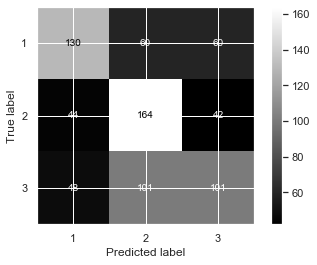

In [9]:
knn = KNeighborsClassifier(n_neighbors=11)


knn.fit(X_train, y_train)




y_pred = knn.predict(X_test)
test_result['n neighbors=11_1'] = y_pred
acc3 = accuracy_score(y_test, y_pred)
recognition_rate['Neighbors=11'] = f1_score(y_test2, y_pred, average=None)
print(classification_report(y_test, y_pred, target_names=target))
plot_confusion_matrix(knn, X_test, y_test, cmap=plt.get_cmap('gray'))
plt.show()

              precision    recall  f1-score   support

      No-use       0.62      0.48      0.54       250
   Long-term       0.49      0.62      0.54       250
  Short-term       0.47      0.45      0.46       250

    accuracy                           0.52       750
   macro avg       0.53      0.52      0.52       750
weighted avg       0.53      0.52      0.52       750



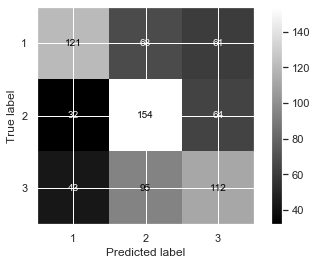

In [10]:
knn.fit(X_train2, y_train2)

y_pred = knn.predict(X_test2)
test_result['n neighbors=11_2'] = y_pred
acc4 = accuracy_score(y_test2, y_pred)

print(classification_report(y_test2, y_pred, target_names=target))
plot_confusion_matrix(knn, X_test2, y_test2, cmap=plt.get_cmap('gray'))
plt.show()

## Rata-Rata Accuracy test 2

In [11]:
print("Accuracy Average:",  (acc3+acc4)/2 * 100, "%")

Accuracy Average: 52.13333333333333 %


### Test 3


              precision    recall  f1-score   support

      No-use       0.57      0.52      0.55       250
   Long-term       0.50      0.64      0.56       250
  Short-term       0.46      0.38      0.42       250

    accuracy                           0.51       750
   macro avg       0.51      0.51      0.51       750
weighted avg       0.51      0.51      0.51       750



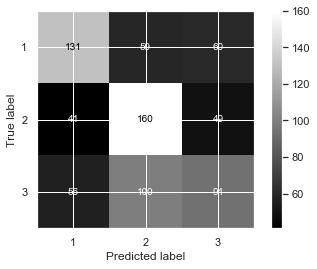

In [12]:
knn = KNeighborsClassifier(n_neighbors=9)


knn.fit(X_train, y_train)


y_pred = knn.predict(X_test)
test_result['n neighbors=9_1'] = y_pred
acc5 = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred, target_names=target))
plot_confusion_matrix(knn, X_test, y_test, cmap=plt.get_cmap('gray'))
plt.show()

              precision    recall  f1-score   support

      No-use       0.59      0.50      0.54       250
   Long-term       0.51      0.64      0.57       250
  Short-term       0.48      0.43      0.45       250

    accuracy                           0.52       750
   macro avg       0.53      0.52      0.52       750
weighted avg       0.53      0.52      0.52       750



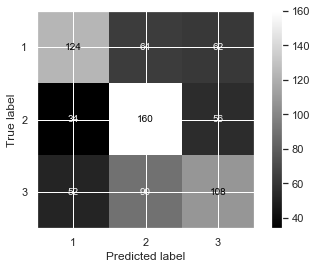

In [13]:
knn.fit(X_train2, y_train2)

y_pred = knn.predict(X_test2)
test_result['n neighbors=9_2'] = y_pred
acc6 = accuracy_score(y_test2, y_pred)
recognition_rate['Neighbors=9'] = f1_score(y_test2, y_pred, average=None)
print(classification_report(y_test2, y_pred, target_names=target))
plot_confusion_matrix(knn, X_test2, y_test2, cmap=plt.get_cmap('gray'))
plt.show()

## Rata-Rata Accuracy test 3

In [14]:
print("Accuracy Average:",  (acc5+acc6)/2 * 100, "%")

Accuracy Average: 51.800000000000004 %


## Export

In [15]:
test_result.to_excel('C:/Users/A S U S/Desktop/KNN_result.xlsx', index=False)
test_result.head()

,y_test,y_test2,n neighbors=5_1,n neighbors=5_2,n neighbors=11_1,n neighbors=11_2,n neighbors=9_1,n neighbors=9_2
0,1,1,1,2,1,3,1,3
1,1,1,2,3,2,1,2,1
2,1,1,3,1,1,2,1,1
3,1,1,1,1,2,1,1,1
4,1,1,1,1,1,3,1,1


## Plotting Pengujian
### Recognition Rate dari percobaan

In [16]:
recognition_rate.reset_index(inplace=True)
recognition_rate

,Classes,Neighbors=5,Neighbors=11,Neighbors=9
0,No-use,0.572565,0.550847,0.539130
1,Long-term,0.563636,0.570435,0.567376
2,Short-term,0.451902,0.445916,0.453782


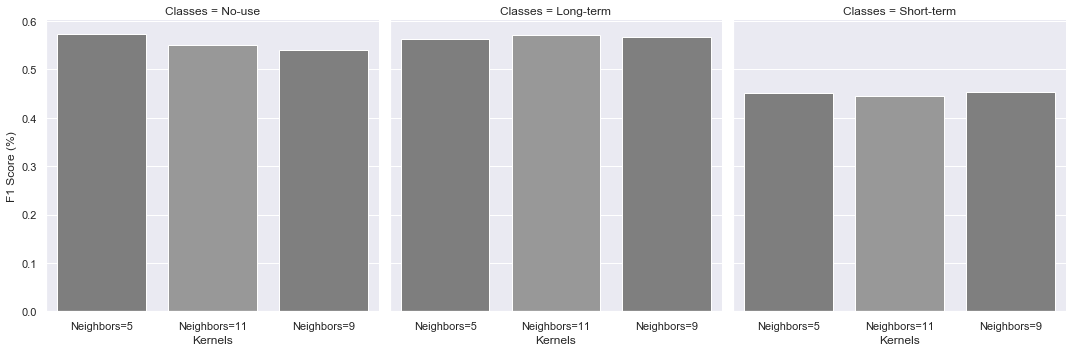

In [17]:
recognition_bar = pd.melt(recognition_rate, 'Classes', var_name='Kernels', value_name='F1 Score (%)')
sns.catplot(data=recognition_bar, x='Kernels', y='F1 Score (%)', col='Classes', kind='bar', palette=sns.color_palette(desat=0))
plt.show()

### Perbandingan Rata-rata Accuracy

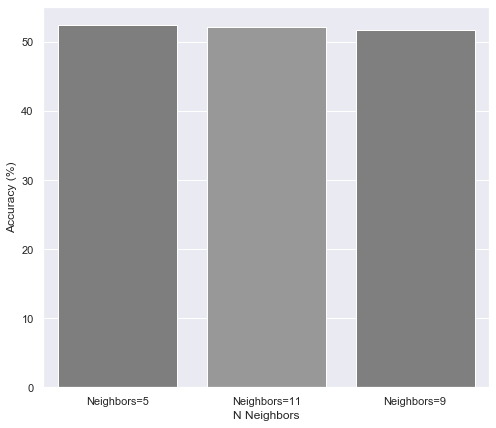

In [18]:
plt.figure(figsize=(8,7))
plt.xlabel('N Neighbors')
plt.ylabel('Accuracy (%)')
x = ['Neighbors=5', 'Neighbors=11', 'Neighbors=9']
y = [(acc1+acc2)/2 * 100, (acc3+acc4)/2 * 100, (acc5+acc6)/2 * 100]
sns.barplot(x=x, y=y, palette=sns.color_palette(desat=0))
plt.show()

NameError: name 'x_test' is not defined